# now we will train a model 
*predict whether a person is likely to seel menatl health treatment which* *will be  mostly binary* 
  ---
*and the second task is*  ---
# regression task 
" have to predict 7the respondents age "


In [66]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,roc_curve,f1_score,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression


In [67]:
st=pd.read_csv("cleaned_survey1.csv")

X = st.drop(columns=[ 'treatment']) 
y_class=st['treatment']
y_class=y_class.map({'Yes': 1, 'No': 0})
y_reg=st['treatment']
st.head()
st.describe()

,Unnamed: 0,Age,cleaned_employees
count,1251.000000,1251.000000,1243.000000
mean,628.584333,32.076739,319.066774
std,363.680086,7.288272,401.999797
min,0.000000,18.000000,3.000000
25%,313.500000,27.000000,15.000000
50%,628.000000,31.000000,63.000000
75%,942.500000,36.000000,750.000000
max,1258.000000,72.000000,1001.000000


In [68]:
st

,Unnamed: 0,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,cleaned_employees,Gender_clean
0,0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,...,No,Some of them,Yes,No,Maybe,Yes,No,unknown,15.0,Female
1,1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,...,No,No,No,No,No,unknown,No,unknown,1001.0,Male
2,2,2014-08-27 11:29:44,32,Male,Canada,unknown,No,No,No,Rarely,...,No,Yes,Yes,Yes,Yes,No,No,unknown,15.0,Male
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,unknown,No,Yes,Yes,Often,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,unknown,63.0,Male
4,4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,...,No,Some of them,Yes,Yes,Yes,unknown,No,unknown,300.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1254,2015-09-12 11:17:21,26,male,United Kingdom,unknown,No,No,Yes,Sometimes,...,No,Some of them,Some of them,No,No,unknown,No,unknown,NaN,Male
1247,1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,...,No,Some of them,Yes,No,No,Yes,No,unknown,NaN,Male
1248,1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,...,Yes,No,No,No,No,No,No,unknown,NaN,Male
1249,1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Sometimes,...,No,No,No,No,No,No,No,unknown,NaN,Female


In [69]:
st.drop(['Unnamed: 0','Timestamp','state','Gender','no_employees'],axis=1, inplace=True)

In [70]:
st

,Age,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,cleaned_employees,Gender_clean
0,37,United States,No,No,Yes,Often,No,Yes,Yes,unknown,...,No,Some of them,Yes,No,Maybe,Yes,No,unknown,15.0,Female
1,44,United States,No,No,No,Rarely,No,No,unknown,No,...,No,No,No,No,No,unknown,No,unknown,1001.0,Male
2,32,Canada,No,No,No,Rarely,No,Yes,No,No,...,No,Yes,Yes,Yes,Yes,No,No,unknown,15.0,Male
3,31,United Kingdom,No,Yes,Yes,Often,No,Yes,No,Yes,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,unknown,63.0,Male
4,31,United States,No,No,No,Never,Yes,Yes,Yes,No,...,No,Some of them,Yes,Yes,Yes,unknown,No,unknown,300.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,26,United Kingdom,No,No,Yes,Sometimes,No,Yes,No,No,...,No,Some of them,Some of them,No,No,unknown,No,unknown,NaN,Male
1247,32,United States,No,Yes,Yes,Often,Yes,Yes,Yes,Yes,...,No,Some of them,Yes,No,No,Yes,No,unknown,NaN,Male
1248,34,United States,No,Yes,Yes,Sometimes,No,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,unknown,NaN,Male
1249,46,United States,No,No,No,Sometimes,Yes,Yes,No,Yes,...,No,No,No,No,No,No,No,unknown,NaN,Female


In [71]:
st.corr(numeric_only=True)['Age'].sort_values(ascending=False)


Age                  1.000000
cleaned_employees   -0.023176
Name: Age, dtype: float64

In [72]:
print(st.columns.tolist())


['Age', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments', 'cleaned_employees', 'Gender_clean']


In [73]:
st.isnull().sum()

Age                          0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
cleaned_employees            8
Gender_clean                 0
dtype: int64

In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

st=pd.read_csv("cleaned_survey3.csv")
y=st['treatment']
X=st.drop(columns=['treatment'])
# drop rows where targets are missing 
st_combined= pd.concat([X, y], axis=1).dropna(subset=['treatment'])
X=st_combined.drop(columns=['treatment'])
y=st_combined['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
def create_pipeline(X):
    categorical_cols=X.select_dtypes(include=['object','category']).columns.tolist()
    numerical_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
    numerical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    #Combine into column transformer
    preprocessor = ColumnTransformer([
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
    return preprocessor




# classification task : will they seek treatment 
starting with logistic regression + grid search 

In [76]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('preprocessor', create_pipeline(X_train)),
    ('clf', LogisticRegression(max_iter=3000))
])
param_grid={
    'clf__C': [0.01, 0.1, 1, 10, ],
    'clf__solver':['lbfgs','saga'],
    'clf__penalty':['l2'],
}
gs_lr = GridSearchCV(pipe_lr, param_grid, cv=5)
gs_lr.fit(X_train, y_train)
y_pred = gs_lr.predict(X_test)
y_proba = gs_lr.predict_proba(X_test)[:, 1]
print("Best parameters:", gs_lr.best_params_)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Best parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
               precision    recall  f1-score   support

          No       0.66      0.74      0.70       113
         Yes       0.76      0.68      0.72       138

    accuracy                           0.71       251
   macro avg       0.71      0.71      0.71       251
weighted avg       0.72      0.71      0.71       251

ROC-AUC Score: 0.7702962677953059


# Random forest classifier 

In [77]:
def build_preprocessing_pipeline(X):
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
    return preprocessor


In [78]:
# Building fulll pipeline
pipe_rf = Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train)),
    ('clf', RandomForestClassifier(random_state=42))
])
param_grid = {
    'clf__n_estimators': [ 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5,],
    'clf__min_samples_leaf': [1, 2],
}
gs_rf = GridSearchCV(pipe_rf, param_grid, cv=5, n_jobs=-1)
gs_rf.fit(X_train, y_train)
import pickle


with open("random_forest_pipeline.pkl", "wb") as f:
    pickle.dump(gs_rf, f)
y_pred_rf = gs_rf.predict(X_test)
y_proba_rf = gs_rf.predict_proba(X_test)[:, 1]
print("Best parameters for Random Forest:", gs_rf.best_params_)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score for Random Forest:", roc_auc_score(y_test, y_proba_rf))

Best parameters for Random Forest: {'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Classification Report for Random Forest:
               precision    recall  f1-score   support

          No       0.69      0.73      0.71       113
         Yes       0.77      0.74      0.75       138

    accuracy                           0.73       251
   macro avg       0.73      0.73      0.73       251
weighted avg       0.73      0.73      0.73       251

ROC-AUC Score for Random Forest: 0.7970373220469411


In [79]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
 
pipe_xgb = Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid= {
    'clf__n_estimators' : [100,200],
    'clf__max_depth': [3,5,7],
    'clf__learning_rate':[0.01,0.1],
    'clf__subsample': [0.8,1.0],
    'clf__colsample_bytree': [0.8,1.0]

}
y_train = y_train.map({'Yes':1, 'No':0})
y_test=y_test.map({'Yes':1, 'No':0})
gs_xgb= GridSearchCV(pipe_xgb, param_grid=param_grid, cv=5, n_jobs=-1)
gs_xgb.fit(X_train, y_train)
y_pred= gs_xgb.predict(X_test)
y_proba=gs_xgb.predict_proba(X_test)[:,1]
print("BESt parameters", gs_xgb.best_params_)
print("Classification Report\n", classification_report(y_test, y_pred))
print("ROC-AUC Score", roc_auc_score(y_test, y_proba))

BESt parameters {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__subsample': 1.0}
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       113
           1       0.76      0.77      0.76       138

    accuracy                           0.74       251
   macro avg       0.73      0.73      0.73       251
weighted avg       0.74      0.74      0.74       251

ROC-AUC Score 0.7788251891753238


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [09:28:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Support Vector Machine (SVM):

In [80]:
from sklearn.svm import SVC
pipe_svm= Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train)),
    ('clf', SVC(probability=True))
])
param_grid= {
    'clf__C': [ 1],
    'clf__kernel': [ 'rbf'], 
    'clf__gamma': ['scale']  

}
gs_svm = GridSearchCV(pipe_svm, param_grid, cv=5, n_jobs=-1)
gs_svm.fit(X_train, y_train)
y_pred_svm = gs_svm.predict(X_test)
y_proba_svm = gs_svm.predict_proba(X_test)[:, 1]
print("Best parameters for SVM:", gs_svm.best_params_)
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("ROC-AUC Score for SVM:", roc_auc_score(y_test, y_proba_svm))


Best parameters for SVM: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.47      0.81      0.59       113
           1       0.62      0.26      0.37       138

    accuracy                           0.51       251
   macro avg       0.55      0.53      0.48       251
weighted avg       0.55      0.51      0.47       251

ROC-AUC Score for SVM: 0.43452609978196743


SVM is not working upto mark and is giving less accuracy as compared to other two classifiers

# Comparative Analysis

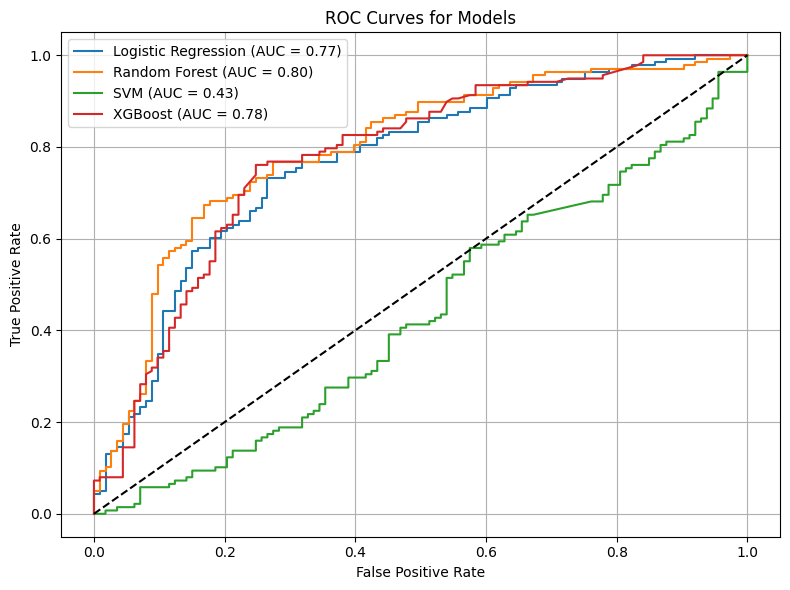

In [81]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
y_test_new = y_test.map({'No': 0, 'Yes': 1}) if y_test.dtype == object else y_test
plt.figure(figsize=(8, 6))
models={
    'Logistic Regression': gs_lr,
    'Random Forest': gs_rf,
    'SVM': gs_svm,
    'XGBoost': gs_xgb
}
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        decision_scores=model.decision_function(X_test)
        y_proba= MinMaxScaler().fit_transform(decision_scores.reshape(-1, 1)).ravel()
    fpr, tpr,_ = roc_curve(y_test_new, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves for Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Regression TASK

In [82]:
X_reg= st.drop(['treatment','Age'], axis=1,)
y_reg= st['Age']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

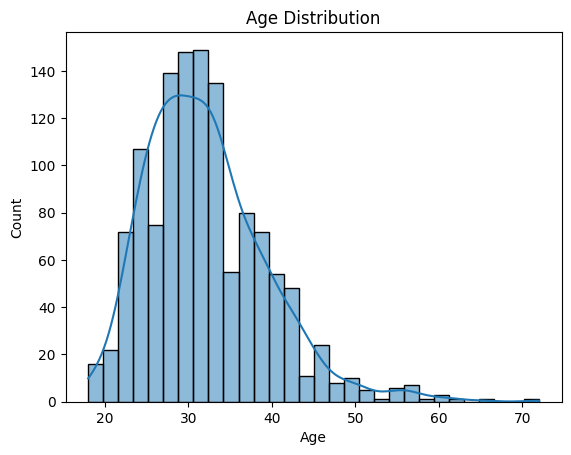

In [83]:
import seaborn as sns
sns.histplot(st['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


we can do binning here to decrease the skewness of the data set . we will make different age groups 

In [84]:
bins = [0, 18, 30, 45, 60, 80, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-80', '81-100']

st['Age_Group'] = pd.cut(st['Age'], bins=bins, labels=labels, right=True)

print(st)

      Unnamed: 0  Age         Country self_employed family_history treatment  \
0              0   37   United States            No             No       Yes   
1              1   44   United States            No             No        No   
2              2   32          Canada            No             No        No   
3              3   31  United Kingdom            No            Yes       Yes   
4              4   31   United States            No             No        No   
...          ...  ...             ...           ...            ...       ...   
1246        1254   26  United Kingdom            No             No       Yes   
1247        1255   32   United States            No            Yes       Yes   
1248        1256   34   United States            No            Yes       Yes   
1249        1257   46   United States            No             No        No   
1250        1258   25   United States            No            Yes       Yes   

     work_interfere    no_employees rem

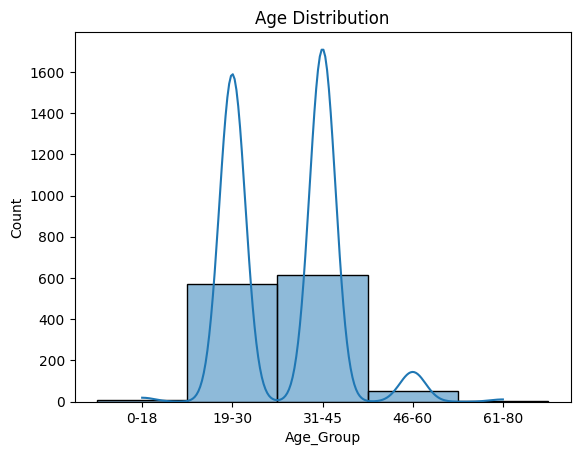

In [85]:
import seaborn as sns
sns.histplot(st['Age_Group'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

In [86]:
X_reg= st.drop(['Age'], axis=1)
y_reg= st['Age']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# linear regression

In [87]:
pipe_lr_reg = Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train_reg)),
    ('regressor' , LinearRegression())
])
pipe_lr_reg.fit(X_train_reg, y_train_reg)
import pickle


with open("regression_pipeline.pkl", "wb") as f:
    pickle.dump(pipe_lr_reg, f)
y_pred_reg = pipe_lr_reg.predict(X_test_reg)


print("Linear Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))

Linear Regression Results:
Mean Absolute Error: 5.30036667404385
Mean Squared Error: 45.431262867304895
R-squared: 0.037941324911725305


In [92]:
pipe_lr_reg_l = Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train_reg)),
    ('regressor' , LinearRegression())
])
y_log = np.log1p(y_reg)
X_train_regl, X_test_reg1l, y_train_regl, y_test_regl = train_test_split(X_reg, y_log, test_size=0.2, random_state=42)
pipe_lr_reg_l.fit(X_train_regl, y_train_regl)
import pickle


with open("regression_l_pipeline.pkl", "wb") as f:
    pickle.dump(pipe_lr_reg_l, f)

y_pred_regl = pipe_lr_reg.predict(X_test_reg)


print("Linear Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test_regl, y_pred_regl))
print("Mean Squared Error:", mean_squared_error(y_test_regl, y_pred_regl))
print("R-squared:", r2_score(y_test_regl, y_pred_regl))

Linear Regression Results:
Mean Absolute Error: 0.1600359652312544
Mean Squared Error: 0.039701261589493844
R-squared: 0.048059399227337596


In [89]:
from sklearn.ensemble import RandomForestRegressor
pipe_rf_reg = Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train_reg)),
    ('regressor', RandomForestRegressor(random_state=42))
])
param_grid_reg = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
}
gs_rf_reg = GridSearchCV(pipe_rf_reg, param_grid=param_grid_reg, cv=5, n_jobs=-1)
gs_rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = gs_rf_reg.predict(X_test_reg)

print("Best parameters for Random Forest Regression:", gs_rf_reg.best_params_)
print("Random Forest Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_rf_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_rf_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_rf_reg))


Best parameters for Random Forest Regression: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Random Forest Regression Results:
Mean Absolute Error: 5.331748938100357
Mean Squared Error: 46.41986374925625
R-squared: 0.017006576576440002


# Random Forest with log-transformed features (for skewness)

In [90]:
from sklearn.ensemble import RandomForestRegressor
pipe_rf_reg1 = Pipeline([
    ('preprocessor', build_preprocessing_pipeline(X_train_reg)),
    ('regressor', RandomForestRegressor(random_state=42))
])
param_grid_reg = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
}
y_log = np.log1p(y_reg)
X_train_reg1, X_test_reg1, y_train_reg1, y_test_reg1 = train_test_split(X_reg, y_log, test_size=0.2, random_state=42)
gs_rf_reg1 = GridSearchCV(pipe_rf_reg1, param_grid=param_grid_reg, cv=5, n_jobs=-1)
gs_rf_reg1.fit(X_train_reg1, y_train_reg1)
y_pred_rf_reg1 = gs_rf_reg1.predict(X_test_reg1)

print("Best parameters for Random Forest Regression:", gs_rf_reg.best_params_)
print("Random Forest Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg1, y_pred_rf_reg1))
print("Mean Squared Error:", mean_squared_error(y_test_reg1, y_pred_rf_reg1))
print("R-squared:", r2_score(y_test_reg1, y_pred_rf_reg1))


Best parameters for Random Forest Regression: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Random Forest Regression Results:
Mean Absolute Error: 0.16081238343915996
Mean Squared Error: 0.040219925079340274
R-squared: 0.03562309835537958
